In [29]:
import pandas as pd
import matplotlib.pyplot as plt

from agage_archive.io import read_nc, read_c, combine_datasets, read_ale_gage, Paths

paths = Paths()

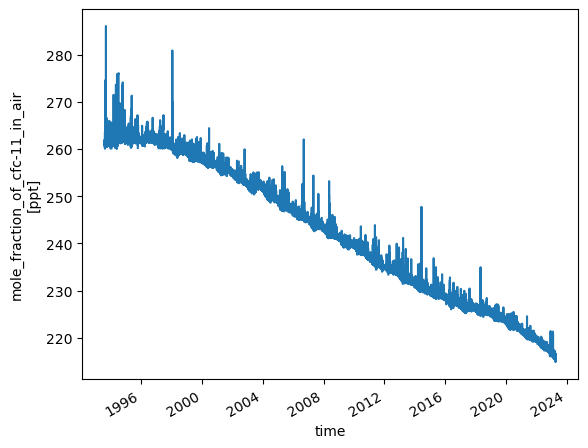

In [30]:
df_CGO = read_nc("cfc-11", "CGO", "GCMD")

df_CGO.mf.plot()


In [31]:
df_CGO

<xarray.Dataset>
Dimensions:                   (time: 326773)
Coordinates:
  * time                      (time) datetime64[ns] 1993-08-10T05:02:00 ... 2...
Data variables:
    inlet_height              (time) int32 10 70 10 70 10 70 ... 70 70 70 70 70
    mf                        (time) float32 nan nan nan nan ... 215.7 215.4 nan
    mf_repeatability          (time) float32 nan nan nan ... 0.1481 0.1405 nan
    data_flag                 (time) int8 70 70 70 70 70 70 70 ... 0 0 0 0 0 0 0
    integration_flag          (time) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    git_pollution_flag        (time) int8 66 66 66 66 66 66 66 ... 0 0 0 0 0 0 0
    met_office_baseline_flag  (time) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes: (12/13)
    comment:                    AGAGE GCMD measurements. Output from GCWerks....
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    inlet_latitude:             -40.683000
    ...                         ...
    inlet_comment:              multiple inlets have been used at the station...
    data_dir:                   /agage/capegrim
    species:                    cfc-11
    calibration_scale:          SIO-05
    units:                      ppt
    file_created:               2023-04-11 08:18:30

In [80]:
df_ale_gage = read_ale_gage("CFC-11", "SMO", "GAGE")

<Axes: >

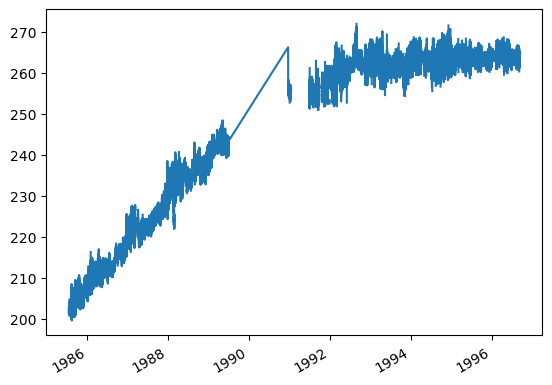

In [83]:
df_ale_gage["mf"].plot()

In [102]:
species = "CFC-11"

mf = df_ale_gage["mf"].values
mf_original = mf.copy()

scale_converter = pd.read_csv(paths.root / "data/scale_convert.csv", index_col="Species")

In [103]:
scale_original = "SIO-93"
scale_new = "SIO-98"

scale_numerator = [ratio.split("/")[0] for ratio in scale_converter.columns]
scale_denominator = [ratio.split("/")[1] for ratio in scale_converter.columns]

# Check for duplicates in numerator or denominator (can't handle this yet)
if len(set(scale_denominator)) != len(scale_denominator):
    print("Can't deal with multiple factors for same scale at the moment")
if len(set(scale_numerator)) != len(scale_numerator):
    print("Can't deal with multiple factors for same scale at the moment")


In [104]:
# Find chain of ratios to apply (start from end and work backwards)
columns = [scale_numerator.index(scale_new)]
while scale_denominator[columns[-1]] != scale_original:
    columns.append(scale_numerator.index(scale_denominator[columns[-1]]))

# Now reverse to propagate forwards
columns = columns[::-1]

In [105]:
# Apply scale conversion factors
for column in columns:
    mf *= scale_converter.loc[species, scale_converter.columns[column]]

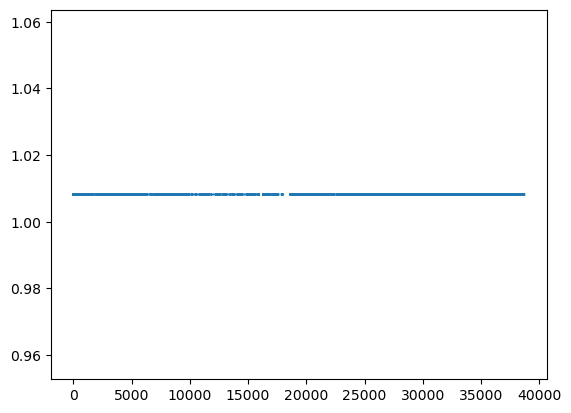

In [106]:
plt.plot(mf/mf_original)

In [107]:
1.0082*0.9945

1.0026549

In [108]:
print(mf/mf_original)

[   nan 1.0082 1.0082 ... 1.0082 1.0082 1.0082]
